In [19]:
import geopandas as gpd
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the zoning dataset
zoning_df = pd.read_csv(
    "/Users/iansargent/Desktop/ORCA/Steamlit App Testing/vt-zoning-update.csv"
)
# Filter out nonresidential districts
zoning_df = zoning_df[zoning_df["District.Type"] != "Nonresidential"]
# Print the first 5 rows
zoning_df.head()

,OBJECTID,Jurisdiction.District.Name,County,Jurisdiction,Abbreviated.District.Name,District.Name,District.Mapped,Overlay.District,Extinct.District,District.Type,...,CONDITIONAL.PUD.Required.with.Subdivision,CONDITIONAL.PUD.Threshold.Number,CONDITIONAL.PUD.Allowance,CONDITIONAL.PUD.Requires.Land.Conservation,Bylaw.Date,RPC,Shape_Length,Shape_Area,Version,Acres
1,1682,Rockingham Central Business,Windham,Rockingham,Cb-7,Central Business,Yes,No,No,Mixed with Residential,...,NaN,NaN,NaN,NaN,NaN,WRC,1767.586726,7.813155e+04,1,19.306698
4,570,Springfield Riverbank Protection Overlay District,Windsor,Springfield,Rpd,Riverbank Protection Overlay District,Yes,No,No,Overlay not Affecting Use,...,NaN,NaN,NaN,NaN,NaN,MARC,35837.152834,5.204685e+06,1,1286.103589
5,1268,Windsor Downtown Design Review Overlay,Windsor,Windsor,Ddr,Downtown Design Review Overlay,Yes,Yes,No,Overlay not Affecting Use,...,NaN,NaN,NaN,NaN,NaN,MARC,6833.846132,6.372553e+05,1,157.468968
6,1276,Windsor Village Mixed Use,Windsor,Windsor,Vmu,Village Mixed Use,Yes,No,No,Mixed with Residential,...,NaN,NaN,NaN,NaN,NaN,MARC,4439.019045,2.120545e+05,1,52.399738
7,1267,Windsor Central Business,Windsor,Windsor,Cb,Central Business,Yes,No,No,Mixed with Residential,...,NaN,NaN,NaN,NaN,NaN,MARC,8644.095028,2.036671e+05,1,50.327164


In [3]:
# Standardize each column in the data (Mean = 0, Std. Dev. = 1)
zoning_df = zoning_df.dropna(axis=1, how="all")
zoning_df["OBJECTID"] = zoning_df["OBJECTID"].astype(str)
# Define the scaler object
scaler = StandardScaler()
# Filter out non-numeric columns
numeric = zoning_df.select_dtypes(include=["float64", "int64"]).columns
zoning_numeric = zoning_df[numeric]

# Impute NA values with the most frequent value in each column
imputer = SimpleImputer(strategy="most_frequent")
zoning_numeric_imputed = imputer.fit_transform(zoning_numeric)

# Standardize the data and put into a new Dataframe
zoning_df_scaled = scaler.fit_transform(zoning_numeric_imputed)
zoning_df_scaled = pd.DataFrame(zoning_df_scaled)

# Rename columns back to original names with "scaled" suffix
zoning_df_scaled.columns = [f"{col}_scaled" for col in zoning_numeric.columns]
# zoning_df_scaled.insert(0, 'OBJECTID', zoning_df['OBJECTID'].values)

# Ensure the data is standardized
zoning_df_scaled.head(10)

,X1F.Min.Lot_scaled,X1F.Front.Setback_scaled,X1F.Side.Setback_scaled,X1F.Rear.Setback_scaled,X1F.Frontage_scaled,X1F.Max.Lot.Building.Coverage_scaled,X1F.Max.Lot.Impervious.Coverage_scaled,X1F.Min.Parking.Spaces_scaled,X1F.Max.Stories_scaled,X1F.Max.Height_scaled,...,ADU.Max.Bedrooms_scaled,PRD.Min.Lot.Size_scaled,PRD.Max.Density_scaled,PRD.Max.Units_scaled,PUD.Threshold.Number_scaled,Base.Density_scaled,Shape_Length_scaled,Shape_Area_scaled,Version_scaled,Acres_scaled
0,-0.331286,0.220172,-0.032156,-0.173972,-0.333168,-0.245919,0.017069,0.498965,-0.023738,-0.158982,...,-0.242627,-0.040792,-0.140297,-0.059738,-0.015416,-0.219371,-0.647070,-0.532245,0.0,-0.532245
1,-0.331286,0.220172,-0.032156,-0.173972,-0.333168,-0.245919,0.017069,0.498965,-0.023738,-0.158982,...,-0.242627,-0.040792,-0.140297,-0.059738,-0.015416,-0.219371,-0.094027,-0.318067,0.0,-0.318067
2,-0.331286,0.220172,-0.032156,-0.173972,-0.333168,-0.245919,0.017069,0.498965,-0.023738,-0.158982,...,-0.242627,-0.040792,-0.140297,-0.059738,-0.015416,-0.219371,-0.564831,-0.508886,0.0,-0.508886
3,-0.531255,-1.512309,-0.938795,-0.411454,-0.873229,4.145732,0.017069,0.498965,-0.023738,4.438132,...,-0.242627,-0.040792,-0.140297,-0.059738,-0.015416,-0.219371,-0.603706,-0.526650,0.0,-0.526650
4,-0.531255,0.220172,-0.032156,-0.173972,-0.873229,5.343455,0.017069,0.498965,-0.023738,4.438132,...,-0.242627,-0.040792,-0.140297,-0.059738,-0.015416,-0.219371,-0.535445,-0.527000,0.0,-0.527000
5,-0.525133,-0.862629,-0.938795,-0.411454,-0.603198,1.351045,0.017069,0.498965,-0.023738,4.438132,...,-0.242627,-0.040792,-0.140297,-0.059738,-0.015416,-0.219371,-0.233966,-0.499512,0.0,-0.499512
6,-0.331286,0.220172,-0.032156,-0.173972,-0.333168,-0.245919,0.017069,0.498965,-0.023738,0.760441,...,-0.242627,-0.040792,-0.140297,-0.059738,-0.015416,-0.219371,0.339756,-0.316674,0.0,-0.316674
7,-0.331286,0.220172,1.478910,2.200842,-0.333168,-0.245919,0.017069,0.498965,-0.023738,0.760441,...,-0.242627,-0.040792,-0.140297,-0.059738,-0.015416,-0.219371,0.579991,0.285868,0.0,0.285868
8,-0.347610,-0.212948,0.270058,0.538472,0.206894,-0.245919,0.017069,0.498965,-0.023738,0.760441,...,-0.242627,-0.040792,-0.140297,-0.059738,-0.015416,-0.219371,-0.271467,-0.446225,0.0,-0.446225
9,0.484914,0.220172,1.478910,2.200842,1.827079,-0.245919,0.017069,0.498965,-0.023738,0.760441,...,-0.242627,-0.040792,-0.353929,-0.059738,-0.015416,-0.219371,0.512291,0.225494,0.0,0.225494


In [4]:
# PERFORM THE PRINCIPLE COMPONENT ANALYSIS (PCA)

# Create a PCA object to reduce the data to 1 component
pca = PCA(n_components=1)
pca_result = pca.fit_transform(zoning_df_scaled)
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result)
# Add the district type to the PCA DataFrame for coloring
pca_df["District.Type"] = zoning_df["District.Type"].values

loadings = pd.Series(pca.components_[0])
loadings.sort_values(ascending=True, inplace=True)

# Rebuild loadings with names instead of numbers
features_named = zoning_numeric.columns
loadings_named = pd.Series(pca.components_[0], index=features_named)
# Sort loadings
loadings_named.sort_values(ascending=True, inplace=True)

pd.set_option("display.max_rows", 1000)

In [5]:
# Add the index result to the zoning DataFrame
zoning_df["Restrictiveness Index"] = pca_result[:, 0]
# Scale the index to a range of 0 to 100
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 100))
# Add the restrictiveness index to the zoning DataFrame
zoning_df["Restrictiveness Index"] = scaler.fit_transform(pca_result[:, [0]])

In [6]:
# Select relevant columns for display
zoning_df[
    ["OBJECTID", "District.Type", "Jurisdiction.District.Name", "Restrictiveness Index"]
]

# Display the top 10 most and least size-restrictive zoning districts
top_10_restrictive = zoning_df.nlargest(10, "Restrictiveness Index")
print("Top 10 Most Size-Restrictive Zoning Districts:")
print(top_10_restrictive[["Jurisdiction.District.Name", "Restrictiveness Index"]])

# Display the bottom 10 least size-restrictive zoning districts
bottom_10_restrictive = zoning_df.nsmallest(10, "Restrictiveness Index")
print("\nTop 10 Least Size-Restrictive Zoning Districts:")
print(bottom_10_restrictive[["Jurisdiction.District.Name", "Restrictiveness Index"]])

Top 10 Most Size-Restrictive Zoning Districts:
                             Jurisdiction.District.Name  Restrictiveness Index
1696         North Bennington Shoreland Protection Area             100.000000
238   Cabot Low Density Residential And Agricultural...              92.756060
1171                            West Haven Agricultural              87.962214
1273                      Leicester Industrial District              71.994939
1112                Waltham Highway Commercial District              71.107741
925              Ferrisburgh Highway Mixed-Use District              65.762265
1615                              Glastenbury Forest #1              57.181582
738                             Colchester Agricultural              56.542408
740                         Colchester Residential Five              56.081158
739                          Colchester Residential Ten              56.029039

Top 10 Least Size-Restrictive Zoning Districts:
                            Jurisdi

In [7]:
# Selecting only categorical columns for recoding
zoning_cat = zoning_df.select_dtypes(include=["object"])
zoning_cat.columns.tolist()

# Recode categorical columns to numeric values
columns_to_recode = [
    "OBJECTID",
    "Affordable.Housing.District",
    "X1F.Allowance",
    "X2F.Allowance",
    "X3F.Allowance",
    "X4F.Allowance",
    "X5F.Allowance",
    "ADU.Allowance",
    "PRD.Allowance",
    "PUD.Requires.Land.Conservation",
    "PUD.Allowance",
    "PRD.Mobile.or.Manufactured.Home.Park",
    "ADU.Restricted.to.Primary.Structure",
    "ADU.Elderly.Housing.Only",
    "ADU.Renter.Occupancy.Prohibited",
]


# Redefine the DataFrame with columns of interest
zoning_cat = zoning_cat[columns_to_recode]

In [8]:
# RECODING CATEGORICAL COLUMNS
# Affordable hosuing District
zoning_cat["Affordable.Housing.District"] = zoning_cat[
    "Affordable.Housing.District"
].replace({"No": 1, "Yes": 0})
# Elderly Housing District
# ADU Allowance
zoning_cat["ADU.Allowance"] = zoning_cat["ADU.Allowance"].replace(
    {
        "Permitted": 0,
        "Not Mentioned": 0,
        "Allowed/Conditional": 1,
        "Overlay": 2,
        "Public Hearing": 3,
        "Prohibited": 4,
    }
)
# PRD Allowance
zoning_cat["PRD.Allowance"] = zoning_cat["PRD.Allowance"].replace(
    {
        "Not Mentioned": 0,
        "Allowed/Conditional": 1,
        "Overlay": 2,
        "Public Hearing": 3,
        "Prohibited": 4,
    }
)
# PUD Allowance
zoning_cat["PUD.Allowance"] = zoning_cat["PUD.Allowance"].replace({"No": 1, "Yes": 0})

# Family Size Allowances (1F, 2F, 3F, 4F, 5F)
zoning_cat["X1F.Allowance"] = zoning_cat["X1F.Allowance"].replace(
    {"Permitted": 0, "Overlay": 1, "Public Hearing": 2, "Prohibited": 3}
)
zoning_cat["X2F.Allowance"] = zoning_cat["X2F.Allowance"].replace(
    {"Permitted": 0, "Overlay": 1, "Public Hearing": 2, "Prohibited": 3}
)
zoning_cat["X3F.Allowance"] = zoning_cat["X3F.Allowance"].replace(
    {"Permitted": 0, "Overlay": 1, "Public Hearing": 2, "Prohibited": 3}
)
zoning_cat["X4F.Allowance"] = zoning_cat["X4F.Allowance"].replace(
    {"Permitted": 0, "Overlay": 1, "Public Hearing": 2, "Prohibited": 3}
)
zoning_cat["X5F.Allowance"] = zoning_cat["X5F.Allowance"].replace(
    {"Allowed/Conditional": 0, "Overlay": 1, "Public Hearing": 2, "Prohibited": 3}
)

# Connection to Sewage/Water Required (X3F, X4F, X5F)                                                                                                                       'T': 1, 'Yes': 1})

# Affordable Housing Only (X5F)
# PUD Requires Land Conservation
zoning_cat["PUD.Requires.Land.Conservation"] = zoning_cat[
    "PUD.Requires.Land.Conservation"
].replace({"No": 0, "F": 0, "Yes": 1, "T": 1})
# PUD Required with Subdivis=
# PRD Mobile or Manufactured Home Park
zoning_cat["PRD.Mobile.or.Manufactured.Home.Park"] = zoning_cat[
    "PRD.Mobile.or.Manufactured.Home.Park"
].replace({"No": 1, "Yes": 0})

# ADU Restrictions
zoning_cat["ADU.Restricted.to.Primary.Structure"] = zoning_cat[
    "ADU.Restricted.to.Primary.Structure"
].replace({"No": 0, "Yes": 1})
zoning_cat["ADU.Elderly.Housing.Only"] = zoning_cat["ADU.Elderly.Housing.Only"].replace(
    {"No": 0, "Yes": 1}
)
zoning_cat["ADU.Renter.Occupancy.Prohibited"] = zoning_cat[
    "ADU.Renter.Occupancy.Prohibited"
].replace({"No": 0, "Yes": 1})

# ADU Employee or Family Occupancy Required

/var/folders/8l/y05qh_5x11dgh8gq_xc0jp880000gn/T/ipykernel_47868/198667704.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  zoning_cat['Affordable.Housing.District'] = zoning_cat['Affordable.Housing.District'].replace({'No': 1, 'Yes': 0})
/var/folders/8l/y05qh_5x11dgh8gq_xc0jp880000gn/T/ipykernel_47868/198667704.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  zoning_cat['ADU.Allowance'] = zoning_cat['ADU.Allowance'].replace({'Permitted': 0, 'Not Mentioned':0,
/var/folders/8l/y05qh_5x11dgh8gq_xc0jp880000gn/T/ipykernel_47868/

In [13]:
# Impute NA values with the most frequent value in each column
imputer_cat = SimpleImputer(strategy="most_frequent")
zoning_cat_imputed = pd.DataFrame(
    imputer_cat.fit_transform(zoning_cat), columns=zoning_cat.columns
)

scaler_cat = StandardScaler()
zoning_cat_scaled = scaler_cat.fit_transform(zoning_cat_imputed)

zoning_cat_scaled = pd.DataFrame(zoning_cat_scaled)
zoning_cat_scaled.columns = [f"{col}_scaled" for col in zoning_cat.columns]

zoning_cat_scaled.describe()

,OBJECTID_scaled,Affordable.Housing.District_scaled,X1F.Allowance_scaled,X2F.Allowance_scaled,X3F.Allowance_scaled,X4F.Allowance_scaled,X5F.Allowance_scaled,ADU.Allowance_scaled,PRD.Allowance_scaled,PUD.Requires.Land.Conservation_scaled,PUD.Allowance_scaled,PRD.Mobile.or.Manufactured.Home.Park_scaled,ADU.Restricted.to.Primary.Structure_scaled,ADU.Elderly.Housing.Only_scaled,ADU.Renter.Occupancy.Prohibited_scaled
count,1.403000e+03,1.403000e+03,1.403000e+03,1.403000e+03,1.403000e+03,1.403000e+03,1.403000e+03,1.403000e+03,1.403000e+03,1.403000e+03,1.403000e+03,1.403000e+03,1.403000e+03,1403.000000,1.403000e+03
mean,-5.064453e-17,-7.849902e-17,-6.077343e-17,-1.012891e-17,-6.077343e-17,5.824121e-17,-2.557549e-16,-1.190146e-16,7.596679e-18,-4.051562e-17,-8.609570e-17,1.418047e-16,8.103125e-17,0.000000,-1.012891e-17
std,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357,1.000357e+00
min,-1.756567e+00,-1.180254e+01,-4.522089e-01,-6.604891e-01,-1.613687e+00,-2.569683e+00,-4.255613e+00,-1.394236e+00,-1.121385e+00,-1.893401e+00,-3.222658e-01,-1.714938e+00,-3.368858e-01,-0.075728,-9.670842e-02
25%,-8.600262e-01,8.472751e-02,-4.522089e-01,-6.604891e-01,-7.055431e-01,-1.070701e-01,-8.035074e-02,-2.200986e-01,-1.121385e+00,5.281501e-01,-3.222658e-01,-1.714938e+00,-3.368858e-01,-0.075728,-9.670842e-02
50%,1.241969e-02,8.472751e-02,-4.522089e-01,-6.604891e-01,2.026009e-01,-1.070701e-01,-8.035074e-02,-2.200986e-01,-4.652953e-01,5.281501e-01,-3.222658e-01,5.831116e-01,-3.368858e-01,-0.075728,-9.670842e-02
75%,8.547466e-01,8.472751e-02,-4.522089e-01,1.189144e+00,1.110745e+00,1.124236e+00,-8.035074e-02,-2.200986e-01,8.468842e-01,5.281501e-01,-3.222658e-01,5.831116e-01,-3.368858e-01,-0.075728,-9.670842e-02
max,1.735224e+00,8.472751e-02,3.432173e+00,2.113960e+00,1.110745e+00,1.124236e+00,2.007280e+00,3.302315e+00,1.502974e+00,5.281501e-01,3.103029e+00,5.831116e-01,2.968365e+00,13.205113,1.034036e+01


In [79]:
# PERFORM THE PRINCIPLE COMPONENT ANALYSIS (PCA)
import numpy as np

# Create a PCA object to reduce the data to 1 component
pca_cat = PCA(n_components=2)
pca_cat_result = pca_cat.fit_transform(zoning_cat_scaled)

explained_var_ratio = pca_cat.explained_variance_ratio_  # shape: (12,)
weighted_index = np.dot(pca_cat_result, explained_var_ratio)
scaler = MinMaxScaler()
scaled_index_0_1 = scaler.fit_transform(weighted_index.reshape(-1, 1)).flatten()

# Convert to 0-100 scale
scaled_index_0_100 = scaled_index_0_1 * 100

zoning_df["Categorical Restrictiveness"] = scaled_index_0_100

# zoning_df[['OBJECTID', 'District.Type', 'Jurisdiction.District.Name', 'Categorical Restrictiveness']].sort_values(by='Categorical Restrictiveness', ascending=True).head(10)

In [80]:
# Top 10 most and least categorical restrictive zoning districts
top_10_cat_restrictive = zoning_df.nlargest(5, "Categorical Restrictiveness")
print("Top 10 Most Categorical Restrictive Zoning Districts:")
print(
    top_10_cat_restrictive[
        ["Jurisdiction.District.Name", "Categorical Restrictiveness"]
    ]
)
# Display the bottom 10 least categorical restrictive zoning districts
bottom_10_cat_restrictive = zoning_df.nsmallest(50, "Categorical Restrictiveness")
print("\nTop 10 Least Categorical Restrictive Zoning Districts:")
print(
    bottom_10_cat_restrictive[
        ["Jurisdiction.District.Name", "Categorical Restrictiveness"]
    ]
)

Top 10 Most Categorical Restrictive Zoning Districts:
             Jurisdiction.District.Name  Categorical Restrictiveness
131     Saint Johnsbury Health Services                   100.000000
732   Essex Junction Highway - Arterial                    93.270074
78               Lemington Agricultural                    92.845430
477           Barre City Urban Center 1                    91.745304
1575            Wilmington Conservation                    91.732983

Top 10 Least Categorical Restrictive Zoning Districts:
                             Jurisdiction.District.Name  \
181                                    Barton Mixed Use   
196                         Jay Village Center District   
320             Randolph East Randolph Village District   
355   Randolph Randolph Village Medium Density District   
319   Randolph North And South Randolph Villages Dis...   
84                        Canaan Residential-Commercial   
246                            Peacham Village District   
281 

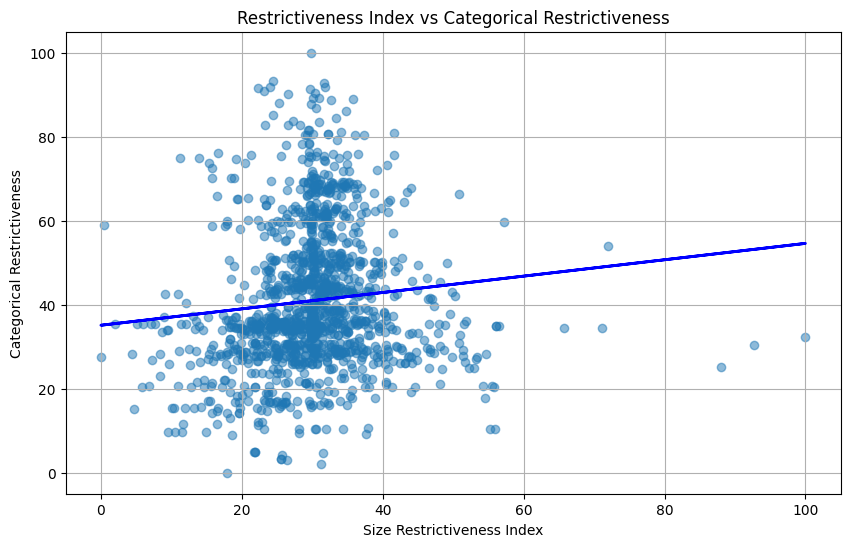

Correlation between Restrictiveness Index and Categorical Restrictiveness: 0.10, p-value: 0.0002


In [81]:
zoning_df[
    [
        "OBJECTID",
        "District.Type",
        "Jurisdiction.District.Name",
        "Restrictiveness Index",
        "Categorical Restrictiveness",
    ]
].sort_values(by="Restrictiveness Index").head(100)

# Scatterplot of Restrictiveness Index vs Categorical Restrictiveness
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    zoning_df["Restrictiveness Index"],
    zoning_df["Categorical Restrictiveness"],
    alpha=0.5,
)
import numpy as np

m = np.polyfit(
    zoning_df["Restrictiveness Index"], zoning_df["Categorical Restrictiveness"], 1
)
plt.plot(
    zoning_df["Restrictiveness Index"],
    m[0] * zoning_df["Restrictiveness Index"] + m[1],
    color="blue",
    linewidth=2,
)
plt.title("Restrictiveness Index vs Categorical Restrictiveness")
plt.xlabel("Size Restrictiveness Index")
plt.ylabel("Categorical Restrictiveness")
plt.grid()
plt.show()

# Calculate the correlation between the two indices
from scipy.stats import pearsonr

corr, p_value = pearsonr(
    zoning_df["Restrictiveness Index"], zoning_df["Categorical Restrictiveness"]
)
print(
    f"Correlation between Restrictiveness Index and Categorical Restrictiveness: {corr:.2f}, p-value: {p_value:.4f}"
)

In [ ]:
# CREATING A PROXY RESTRICTIVENESS INDEX WITH CENSUS DATA
# Read the census data
census = gpd.read_file(
    "/Users/iansargent/Desktop/ORCA/Steamlit App Testing/Census/VT_HOUSING_ALL.fgb"
)
census = census.drop(columns="geometry")

# Select relevant columns for the analysis
census_cols = [
    "DP04_0007PE",
    "DP04_0010PE",
    "DP04_0012PE",
    "DP04_0013PE",
    "DP04_0014PE",
    "DP04_0017PE",
    "DP04_0018PE",
    "DP04_0047PE",
]

census_df = census[census_cols]
# Rename columns for clarity
census_df.columns = [
    "pct.1.unit.attached",
    "pct.3.to.4.units",
    "pct.10.to.19.units",
    "pct.20.or.more.units",
    "pct.mobile.homes",
    "pct.built.2020.or.later",
    "pct.built.2010.to.2019",
    "pct.renter.occupied",
]

census_df

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Reverse flexible indicators
for col in [
    "pct.3.to.4.units",
    "pct.10.to.19.units",
    "pct.20.or.more.units",
    "pct.mobile.homes",
    "pct.built.2020.or.later",
    "pct.built.2010.to.2019",
    "pct.renter.occupied",
]:
    census_df[col] = -1 * census_df[col]

# Impute NA values is mean
imputer_census = SimpleImputer(strategy="mean")
census_df_imputed = pd.DataFrame(
    imputer_census.fit_transform(census_df), columns=census_df.columns
)


# Standardize
scaler = StandardScaler()
census_scaled = scaler.fit_transform(census_df_imputed)

# Optional: convert back to DataFrame for readability
census_scaled_df = pd.DataFrame(census_scaled, columns=census_df.columns)

census_scaled_df

In [95]:
pca_census = PCA(n_components=2)
proxy_index_pca = pca_census.fit_transform(census_scaled_df)

explained_var_ratio_census = pca_census.explained_variance_ratio_  # shape: (12,)
weighted_index = np.dot(proxy_index_pca, explained_var_ratio_census)
scaler = MinMaxScaler()
scaled_index_0_1 = scaler.fit_transform(weighted_index.reshape(-1, 1)).flatten()

# Convert to 0-100 scale
scaled_index_0_100 = scaled_index_0_1 * 100

scaled_index_0_100_df = pd.DataFrame(
    scaled_index_0_100, columns=["Proxy Restrictiveness Index"]
)

census["Proxy Restrictiveness Index"] = scaled_index_0_100

census.sort_values(by="Proxy Restrictiveness Index", ascending=False)

,GEOID,NAME,DP04_0001E,DP04_0001PE,DP04_0002E,DP04_0002PE,DP04_0003E,DP04_0003PE,DP04_0004E,DP04_0004PE,...,DP04_0139PE,DP04_0140E,DP04_0140PE,DP04_0141E,DP04_0141PE,DP04_0142E,DP04_0142PE,DP04_0143E,DP04_0143PE,Proxy Restrictiveness Index
14,5000902125,"Averill town, Essex County, Vermont",283.0,283.0,5.0,1.8,278.0,98.2,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,100.000000
87,5000710300,"Buels gore, Chittenden County, Vermont",10.0,10.0,10.0,100.0,0.0,0.0,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,100.000000
10,5000930775,"Guildhall town, Essex County, Vermont",218.0,218.0,171.0,78.4,47.0,21.6,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,4.0,80.0,7.0,NaN,94.608166
13,5000939700,"Lemington town, Essex County, Vermont",85.0,85.0,55.0,64.7,30.0,35.3,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,94.283922
212,5002147425,"Mount Tabor town, Rutland County, Vermont",169.0,169.0,139.0,82.2,30.0,17.8,0.0,NaN,...,16.7,0.0,0.0,0.0,0.0,2.0,33.3,3.0,NaN,94.202348
244,5000327962,"Glastenbury town, Bennington County, Vermont",3.0,3.0,0.0,0.0,3.0,100.0,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,93.862102
26,5000929125,"Granby town, Essex County, Vermont",78.0,78.0,26.0,33.3,52.0,66.7,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,93.745088
250,5000371425,"Sunderland town, Bennington County, Vermont",566.0,566.0,443.0,78.3,123.0,21.7,0.0,NaN,...,17.4,5.0,21.7,0.0,0.0,14.0,60.9,0.0,NaN,93.674328
252,5000362875,"Sandgate town, Bennington County, Vermont",346.0,346.0,235.0,67.9,111.0,32.1,1.3,NaN,...,20.0,1.0,20.0,0.0,0.0,2.0,40.0,6.0,NaN,93.350804
11,5000942475,"Maidstone town, Essex County, Vermont",321.0,321.0,116.0,36.1,205.0,63.9,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,93.157301
